In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import seaborn as sns

%matplotlib inline

df = pd.read_csv("../data/conversion_rgb_temp_6600.csv", sep=";")
df.head()

,Temperature [K],CMF,x,y,P,R,G,B,r,g,b,#rgb
0,1000,2,0.6499,0.3474,2472000.0,1.0,0.0337,0.0,255,51,0,#ff3300
1,1000,10,0.6472,0.3506,2525000.0,1.0,0.0401,0.0,255,56,0,#ff3800
2,1100,2,0.6361,0.3594,21120000.0,1.0,0.0592,0.0,255,69,0,#ff4500
3,1100,10,0.6348,0.3612,21620000.0,1.0,0.0631,0.0,255,71,0,#ff4700
4,1200,2,0.6226,0.3703,128200000.0,1.0,0.0846,0.0,255,82,0,#ff5200


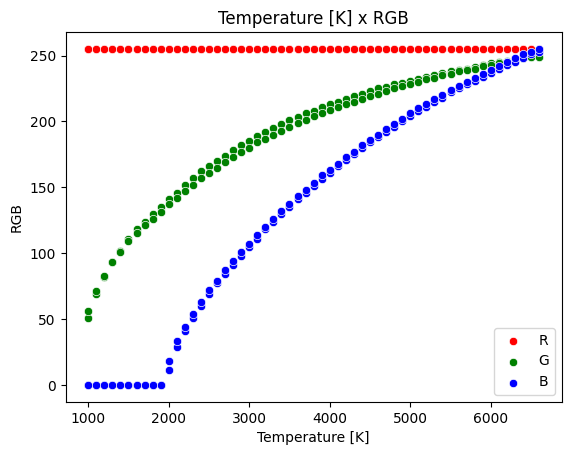

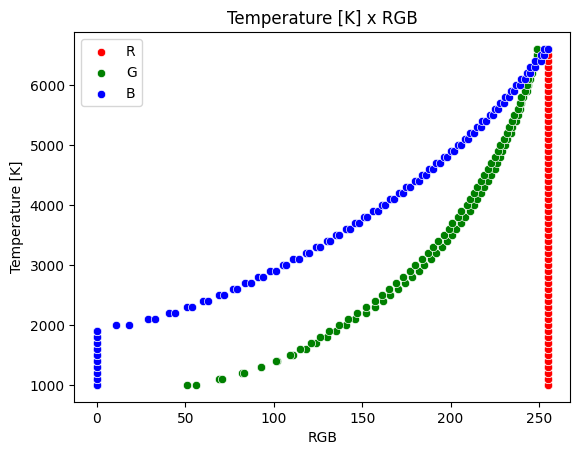

In [5]:
def plot_RGB_TEMP_KELVIN(df):
    """
    """
    temp = df["Temperature [K]"]
    R = df["r"]
    G = df["g"]
    B = df["b"]

    plt.title("Temperature [K] x RGB")
    sns.scatterplot(x=df["r"], y = df["Temperature [K]"], color = 'r')
    sns.scatterplot(x=df["g"], y = df["Temperature [K]"], color = 'g')
    sns.scatterplot(x=df["b"], y = df["Temperature [K]"], color = 'b')
    plt.xlabel("RGB")
    plt.legend(["R", "G", "B"])
    plt.show()

def plot_TEMP_KELVIN_RGB(df):
    """
    """
    temp = df["Temperature [K]"]
    R = df["r"]
    G = df["g"]
    B = df["b"]

    plt.title("Temperature [K] x RGB")
    sns.scatterplot(x=df["Temperature [K]"], y = df["r"], color = 'r')
    sns.scatterplot(x=df["Temperature [K]"], y = df["g"], color = 'g')
    sns.scatterplot(x=df["Temperature [K]"], y = df["b"], color = 'b')
    plt.ylabel("RGB")
    plt.legend(["R", "G", "B"])
    plt.show()

    
plot_TEMP_KELVIN_RGB(df = df)
plot_RGB_TEMP_KELVIN(df= df)


In [6]:
# Maior Temperatura
df.loc[df["r"] == 255, ["Temperature [K]"]].max()

Temperature [K]    6600
dtype: int64

In [68]:
df = pd.read_csv("../data/conversion_rgb_temp_6600_15000.csv", sep=";")
df.tail()

,Temperature [K],CMF,x,y,P,R,G,B,r,g,b,#rgb
165,14800,10,0.2633,0.2709,3.605000e+16,0.4527,0.6033,1.0,179,204,255,#b3ccff
166,14900,2,0.2655,0.2679,3.275000e+16,0.4765,0.5839,1.0,184,201,255,#b8c9ff
167,14900,10,0.2631,0.2707,3.657000e+16,0.4510,0.6020,1.0,179,204,255,#b3ccff
168,15000,2,0.2653,0.2676,3.322000e+16,0.4749,0.5824,1.0,183,201,255,#b7c9ff
169,15000,10,0.2629,0.2704,3.710000e+16,0.4493,0.6007,1.0,179,204,255,#b3ccff


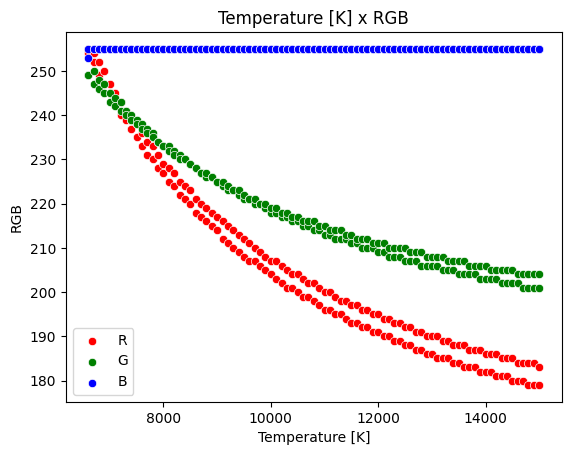

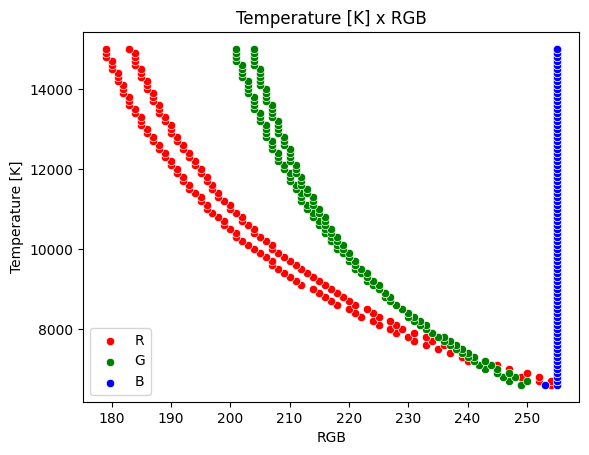

In [69]:
plot_TEMP_KELVIN_RGB(df = df)
plot_RGB_TEMP_KELVIN(df= df)

In [1]:
df = pd.read_csv("../data/conversion_rgb_temp_6000.csv", sep=";")
df.head()

NameError: name 'pd' is not defined

In [2]:
plot_TEMP_KELVIN_RGB(df = df)
plot_RGB_TEMP_KELVIN(df= df)

NameError: name 'plot_TEMP_KELVIN_RGB' is not defined

In [72]:
r, g, b = (255, 55, 0)

df.loc[(df.r == r) & (df.g == g) & (df.b == b), ["Temperature [K]"]]

,Temperature [K]


In [134]:
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("../data/conversion_rgb_temp_full.csv", sep=";")
X = df.loc[:, [col for col in df.columns if col not in ["Temperature [K]", "CMF", "P", "#rgb", "x", "y", "R", "G", "B"]]]
Y = df.loc[:, ["Temperature [K]"]].values

model = RandomForestRegressor(n_estimators= 100, n_jobs=-1)
model.fit(X, Y)

temp_predict = model.predict(np.array([255, 255, 255]).reshape(1, -1))
temp_predict

c:\Users\autog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\autog\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6607.58333333])

In [162]:
def color_temperature_McCamy(RGB: None):
    """
    Args:
    Returns:
    # Min Max Temperature 2300 and 7300
    """

    R, G, B = RGB

    # x = (0.4124564 * R + 0.3575761 * G + 0.1804375 * B) / (0.4124564 * R + 0.3575761 * G + 0.1804375 * B + 0.0886726 * R + 0.7151522 * G + 0.1109909 * B)
    # y = (0.2126729 * R + 0.7151522 * G + 0.0721750 * B) / (0.2126729 * R + 0.7151522 * G + 0.0721750 * B + 0.0858420 * R + 0.5000000 * G + 0.0092100 * B)


    # x, y, z = rgb_to_xyz(RGB)
    n = (x - 0.3320) / (0.1858 - y)
    CCT = 449 * n ** 3 + 3525 * n**2 + 6823.3 * n + 5520.33
    
    return CCT